<a href="https://colab.research.google.com/github/Pacharaponarp/American-Sign-Language-Classification/blob/main/asl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download data from kaggle


In [3]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
! kaggle datasets download danrasband/asl-alphabet-test

 37% 9.00M/24.3M [00:00<00:00, 16.7MB/s]
100% 24.3M/24.3M [00:00<00:00, 39.2MB/s]


In [ ]:
! unzip asl-alphabet-test.zip

#Predict alphabet from images


In [6]:
import numpy as np 
import pandas as pd 
import os,warnings
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers
import matplotlib.pyplot as plt

def set_seed(seed=12345):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore")

In [7]:
datagen = ImageDataGenerator(
    horizontal_flip = True,
    rotation_range =20,
    #brightness_range=(0.2,1.5),
    validation_split=0.1,
   
)
train_gen = datagen.flow_from_directory(
    directory = '/content/asl-alphabet-test',
    target_size = (150,150),
    class_mode = "categorical",
    batch_size = 32,
    subset = 'training', 
    shuffle = True,
)

val_gen = datagen.flow_from_directory(
    directory = '/content/asl-alphabet-test',
    target_size = (150,150),
    class_mode = "categorical",
    batch_size = 32,
    subset = 'validation',
)

Found 783 images belonging to 29 classes.
Found 87 images belonging to 29 classes.


In [8]:
pretrained_model = tf.keras.applications.ResNet50(
    input_shape=(150, 150, 3),
    include_top=False,
    weights='imagenet',
)
pretrained_model.trainable = False

model = keras.Sequential([
    layers.InputLayer(input_shape=(150, 150,3)),
    pretrained_model,
    layers.Flatten(),
    layers.BatchNormalization(renorm=True),
    #layers.Dense(units = 64, activation = 'relu'),
    layers.Dense(units = 29,activation = 'softmax')
])
optimizer = tf.keras.optimizers.Adam(epsilon=0.001)
model.compile(
    optimizer=optimizer,
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)
model.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 batch_normalization (BatchN  (None, 51200)            358400    
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 29)                1484829   
                                                                 
Total params: 25,430,941
Trainable params: 1,587,229
Non-trainable params: 23,843,712
_________________________________________________________________


In [9]:
checkpoint = keras.callbacks.ModelCheckpoint('/content/', monitor='val_accuracy', verbose=1, 
                             save_best_only=True, mode='max')
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=2, 
                                   verbose=1, mode='max', min_lr=0.00001)

In [ ]:
history = model.fit_generator(
    train_gen,
    validation_data=val_gen,
    epochs=30,
    callbacks=[checkpoint,reduce_lr]
)

Epoch 1/30
25/25 [==============================] - ETA: 0s - loss: 10.5635 - accuracy: 0.3116
Epoch 1: val_accuracy improved from -inf to 0.55172, saving model to /content/


25/25 [==============================] - 40s 1s/step - loss: 10.5635 - accuracy: 0.3116 - val_loss: 6.5140 - val_accuracy: 0.5517 - lr: 0.0010
Epoch 2/30
25/25 [==============================] - ETA: 0s - loss: 2.5681 - accuracy: 0.7254
Epoch 2: val_accuracy improved from 0.55172 to 0.70115, saving model to /content/


25/25 [==============================] - 28s 1s/step - loss: 2.5681 - accuracy: 0.7254 - val_loss: 3.0579 - val_accuracy: 0.7011 - lr: 0.0010
Epoch 3/30
25/25 [==============================] - ETA: 0s - loss: 1.1120 - accuracy: 0.8531
Epoch 3: val_accuracy improved from 0.70115 to 0.74713, saving model to /content/


25/25 [==============================] - 28s 1s/step - loss: 1.1120 - accuracy: 0.8531 - val_loss: 2.3994 - val_accuracy: 0.7471 - lr: 0.0010
Epoch 4/30
25/25 [==============================] - ETA: 0s - loss: 0.6336 - accuracy: 0.8940
Epoch 4: val_accuracy did not improve from 0.74713
25/25 [==============================] - 7s 274ms/step - loss: 0.6336 - accuracy: 0.8940 - val_loss: 3.1436 - val_accuracy: 0.7241 - lr: 0.0010
Epoch 5/30
25/25 [==============================] - ETA: 0s - loss: 0.5846 - accuracy: 0.9246
Epoch 5: val_accuracy improved from 0.74713 to 0.78161, saving model to /content/


25/25 [==============================] - 27s 1s/step - loss: 0.5846 - accuracy: 0.9246 - val_loss: 2.4310 - val_accuracy: 0.7816 - lr: 0.0010
Epoch 6/30
25/25 [==============================] - ETA: 0s - loss: 0.3447 - accuracy: 0.9476
Epoch 6: val_accuracy improved from 0.78161 to 0.79310, saving model to /content/


25/25 [==============================] - 28s 1s/step - loss: 0.3447 - accuracy: 0.9476 - val_loss: 2.5988 - val_accuracy: 0.7931 - lr: 0.0010
Epoch 7/30
25/25 [==============================] - ETA: 0s - loss: 0.3925 - accuracy: 0.9464
Epoch 7: val_accuracy did not improve from 0.79310
25/25 [==============================] - 7s 268ms/step - loss: 0.3925 - accuracy: 0.9464 - val_loss: 2.3820 - val_accuracy: 0.7931 - lr: 0.0010
Epoch 8/30
25/25 [==============================] - ETA: 0s - loss: 0.3282 - accuracy: 0.9540
Epoch 8: val_accuracy improved from 0.79310 to 0.80460, saving model to /content/


25/25 [==============================] - 27s 1s/step - loss: 0.3282 - accuracy: 0.9540 - val_loss: 2.4428 - val_accuracy: 0.8046 - lr: 0.0010
Epoch 9/30
25/25 [==============================] - ETA: 0s - loss: 0.3536 - accuracy: 0.9451
Epoch 9: val_accuracy did not improve from 0.80460
25/25 [==============================] - 7s 271ms/step - loss: 0.3536 - accuracy: 0.9451 - val_loss: 1.8180 - val_accuracy: 0.7586 - lr: 0.0010
Epoch 10/30
25/25 [==============================] - ETA: 0s - loss: 0.3709 - accuracy: 0.9515
Epoch 10: val_accuracy did not improve from 0.80460

Epoch 10: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
25/25 [==============================] - 7s 305ms/step - loss: 0.3709 - accuracy: 0.9515 - val_loss: 3.6545 - val_accuracy: 0.7471 - lr: 0.0010
Epoch 11/30
25/25 [==============================] - ETA: 0s - loss: 0.2499 - accuracy: 0.9693
Epoch 11: val_accuracy did not improve from 0.80460
25/25 [==============================] - 7s 273ms/ste

25/25 [==============================] - 28s 1s/step - loss: 0.2074 - accuracy: 0.9732 - val_loss: 2.5342 - val_accuracy: 0.8161 - lr: 2.5000e-04
Epoch 14/30
25/25 [==============================] - ETA: 0s - loss: 0.1806 - accuracy: 0.9834
Epoch 14: val_accuracy did not improve from 0.81609
25/25 [==============================] - 7s 272ms/step - loss: 0.1806 - accuracy: 0.9834 - val_loss: 3.2687 - val_accuracy: 0.7586 - lr: 2.5000e-04
Epoch 15/30
25/25 [==============================] - ETA: 0s - loss: 0.1143 - accuracy: 0.9783
Epoch 15: val_accuracy improved from 0.81609 to 0.87356, saving model to /content/


25/25 [==============================] - 28s 1s/step - loss: 0.1143 - accuracy: 0.9783 - val_loss: 2.1803 - val_accuracy: 0.8736 - lr: 2.5000e-04
Epoch 16/30
25/25 [==============================] - ETA: 0s - loss: 0.1636 - accuracy: 0.9860
Epoch 16: val_accuracy did not improve from 0.87356
25/25 [==============================] - 7s 273ms/step - loss: 0.1636 - accuracy: 0.9860 - val_loss: 3.1553 - val_accuracy: 0.7356 - lr: 2.5000e-04
Epoch 17/30
25/25 [==============================] - ETA: 0s - loss: 0.0675 - accuracy: 0.9872
Epoch 17: val_accuracy did not improve from 0.87356

Epoch 17: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
25/25 [==============================] - 7s 273ms/step - loss: 0.0675 - accuracy: 0.9872 - val_loss: 2.5648 - val_accuracy: 0.8276 - lr: 2.5000e-04
Epoch 18/30
25/25 [==============================] - ETA: 0s - loss: 0.0423 - accuracy: 0.9974
Epoch 18: val_accuracy did not improve from 0.87356
25/25 [==============================] 

best


accuracy        0.998723
val_accuracy    0.873563
dtype: float64

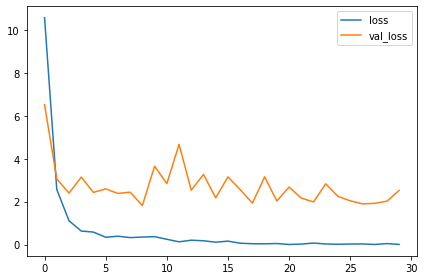

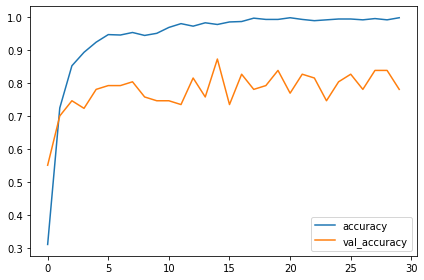

In [ ]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();
print('best')
history_frame.loc[:, ['accuracy', 'val_accuracy']].max()

In [ ]:
results_val = model.evaluate_generator(val_gen, verbose=0)
print("    Val Loss: {:.5f}".format(results_val[0]))
print("Val Accuracy: {:.2f}%".format(results_val[1] * 100))

    Val Loss: 3.42072
Val Accuracy: 81.61%


# Predict alphabet from mediapipe landmarks

In [10]:
!pip install mediapipe opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 31.5 MB 1.5 MB/s 


In [11]:
import numpy as np 
import pandas as pd 
import os,warnings
import cv2
import mediapipe as mp
mp_hands = mp.solutions.hands
mp_holistic = mp.solutions.holistic

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

def set_seed(seed=12345):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore")

In [12]:
data_path = '/content/asl-alphabet-test'
data = []
alp_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z','del','space']
alphabets = os.listdir(data_path)
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:
      for id,alp in enumerate(alphabets):
        print(id+1,'/',len(alphabets))
        folder = os.path.join(data_path,alp)
        for filename in os.listdir(folder):
          file = os.path.join(folder,filename)
          image = cv2.flip(cv2.imread(file), 1)
          results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
          if results.multi_hand_landmarks:
            for hand in results.multi_hand_landmarks:
              lmlist =[]
              for landmark in hand.landmark:
                lmlist.append(landmark.x)
                lmlist.append(landmark.y)
                lmlist.append(landmark.z)
              data.append([alp_list.index(alp)]+lmlist)
df = pd.DataFrame(data)

1 / 29
2 / 29
3 / 29
4 / 29
5 / 29
6 / 29
7 / 29
8 / 29
9 / 29
10 / 29
11 / 29
12 / 29
13 / 29
14 / 29
15 / 29
16 / 29
17 / 29
18 / 29
19 / 29
20 / 29
21 / 29
22 / 29
23 / 29
24 / 29
25 / 29
26 / 29
27 / 29
28 / 29
29 / 29


In [13]:
df.columns = ['class']+[str(landmark)+a for landmark in mp_holistic.HandLandmark for a in ['.x','.y','.z']]

In [14]:
df.head()

,class,HandLandmark.WRIST.x,HandLandmark.WRIST.y,HandLandmark.WRIST.z,HandLandmark.THUMB_CMC.x,HandLandmark.THUMB_CMC.y,HandLandmark.THUMB_CMC.z,HandLandmark.THUMB_MCP.x,HandLandmark.THUMB_MCP.y,HandLandmark.THUMB_MCP.z,...,HandLandmark.PINKY_MCP.z,HandLandmark.PINKY_PIP.x,HandLandmark.PINKY_PIP.y,HandLandmark.PINKY_PIP.z,HandLandmark.PINKY_DIP.x,HandLandmark.PINKY_DIP.y,HandLandmark.PINKY_DIP.z,HandLandmark.PINKY_TIP.x,HandLandmark.PINKY_TIP.y,HandLandmark.PINKY_TIP.z
0,2,0.694566,0.812915,-1.017900e-06,0.563027,0.780594,-0.052885,0.454819,0.660761,-0.103808,...,-0.142231,0.657024,0.345784,-0.208630,0.531597,0.292739,-0.245708,0.436641,0.285474,-0.260347
1,2,0.582024,0.807172,-3.411380e-07,0.452624,0.756742,0.021653,0.365071,0.668033,0.023849,...,-0.058003,0.530955,0.412424,-0.082840,0.461084,0.367185,-0.103459,0.392611,0.348484,-0.116513
2,2,0.834079,0.950281,-3.458352e-07,0.736380,0.932895,-0.054850,0.660682,0.886796,-0.112397,...,-0.169126,0.915762,0.757093,-0.234718,0.864680,0.745449,-0.260814,0.815984,0.752159,-0.272180
3,2,0.634658,0.769992,-1.871419e-07,0.525848,0.735106,-0.007541,0.437470,0.648696,-0.030353,...,-0.085623,0.588188,0.383035,-0.114409,0.511737,0.342861,-0.130707,0.442032,0.337310,-0.138701
4,2,0.614105,0.471619,-2.412480e-07,0.543657,0.454753,-0.016886,0.483127,0.399663,-0.026171,...,-0.023002,0.590567,0.227361,-0.044588,0.557045,0.194071,-0.060819,0.522766,0.177555,-0.069522


In [15]:
x = df.drop(['class'],axis = 1)
y = df['class']
y_one_hot = to_categorical(y)
x_train, x_val, y_train, y_val = train_test_split(x, y_one_hot, test_size=0.2,random_state =1,stratify = y_one_hot)

In [16]:
print(np.sum(y_val,axis=0))

[6. 6. 6. 6. 6. 6. 6. 6. 4. 6. 5. 6. 5. 6. 5. 5. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 4. 4.]


In [18]:
model = keras.Sequential([
    layers.Dense(units = 256,activation='relu',input_shape = (63,)),
    layers.BatchNormalization(renorm=True),
    layers.Dense(units = 128,activation='relu'),
    layers.Dense(units = 128,activation='relu'),    
    layers.Dropout(rate = 0.3),
    layers.Dense(units = 28,activation = 'softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               16384     
                                                                 
 batch_normalization_2 (Batc  (None, 256)              1792      
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 28)                3612      
                                                      

In [19]:
optimizer = tf.keras.optimizers.Adam(epsilon=0.001)
model.compile(
    optimizer=optimizer,
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, 
                                   verbose=1, mode='max', min_lr=0.00001)

In [20]:
history = model.fit(x_train,y_train,
                    validation_data=(x_val, y_val),
                    verbose =1,
                    epochs = 100,
                    callbacks = [early_stopping,reduce_lr])

Epoch 1/100
20/20 [==============================] - 3s 16ms/step - loss: 3.3311 - accuracy: 0.0396 - val_loss: 3.2997 - val_accuracy: 0.0570 - lr: 0.0010
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 3.2805 - accuracy: 0.0681 - val_loss: 3.2493 - val_accuracy: 0.1329 - lr: 0.0010
Epoch 3/100
20/20 [==============================] - 0s 6ms/step - loss: 3.2117 - accuracy: 0.1315 - val_loss: 3.1576 - val_accuracy: 0.2089 - lr: 0.0010
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 3.0909 - accuracy: 0.1933 - val_loss: 2.9870 - val_accuracy: 0.2658 - lr: 0.0010
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 2.8733 - accuracy: 0.2821 - val_loss: 2.7123 - val_accuracy: 0.4557 - lr: 0.0010
Epoch 6/100
20/20 [==============================] - 0s 6ms/step - loss: 2.5896 - accuracy: 0.3899 - val_loss: 2.3614 - val_accuracy: 0.4747 - lr: 0.0010
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 2.

best


accuracy        0.998415
val_accuracy    0.981013
dtype: float64

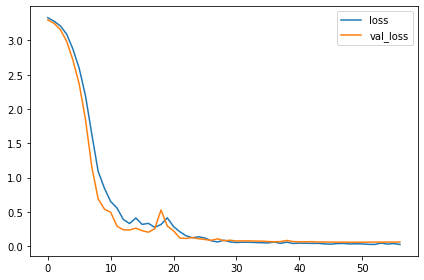

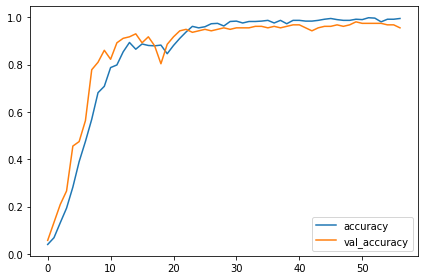

In [21]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();
print('best')
history_frame.loc[:, ['accuracy', 'val_accuracy']].max()

In [23]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_val)
y_pred =y_pred.argmax(axis=1)
y_test_class = y_val.argmax(axis=1)
#confusion_matrix(y_test_class, y_pred)

from sklearn.metrics import classification_report
print(classification_report(y_test_class, y_pred))

5/5 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         6
          12       0.57      0.80      0.67         5
          13       0.75      0.50      0.60         6
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         5
          16       1.00      0

In [24]:
!pip install pyyaml h5py
model.save('/content/my_model.h5') 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
